           loss  accuracy  epoch  train_loss            lr        time
epoch                                                                 
0.0    0.707451  0.527933    0.0  134.320459  1.800000e-05  302.024030
1.0    0.610196  0.639665    1.0  121.168081  3.600000e-05  303.136246
2.0    0.487109  0.743017    2.0   99.595787  4.997946e-05  302.790157
3.0    0.358398  0.829609    3.0   75.911826  4.938123e-05  302.651592
4.0    0.310004  0.871508    4.0   57.414060  4.797395e-05  302.460003
5.0    0.344413  0.871508    5.0   48.071311  4.580432e-05  303.013757
6.0    0.338562  0.877095    6.0   43.468627  4.294434e-05  302.339218
7.0    0.406669  0.877095    7.0   36.042287  3.948891e-05  302.343510
8.0    0.403313  0.888268    8.0   32.485730  3.555270e-05  302.148128
9.0    0.471027  0.882682    9.0   31.566595  3.126631e-05  302.365626
10.0   0.471435  0.891061   10.0   24.882263  2.677199e-05  302.503155
11.0   0.526200  0.885475   11.0   21.348637  2.221887e-05  301.773109
12.0  

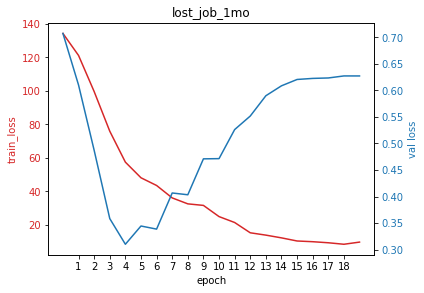

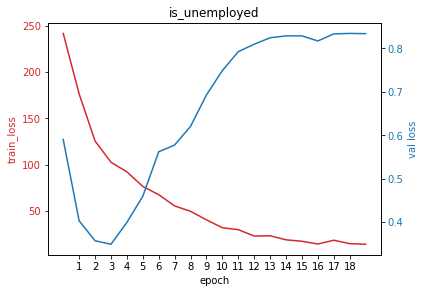

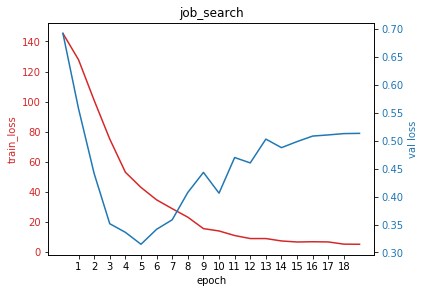

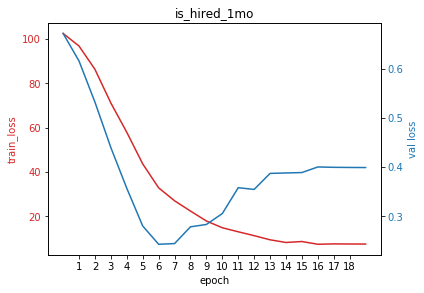

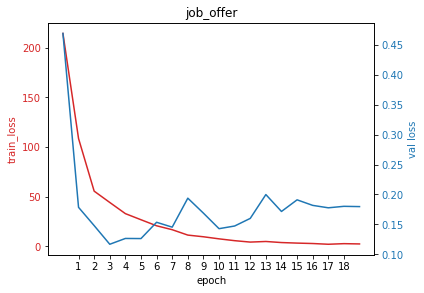

In [2]:
# plotting validation curves

import time
start_time = time.time()

import pandas as pd
import random
import numpy as np
import os

# dirs = os.listdir( './' )

counter = 0
for column in ["lost_job_1mo","is_unemployed", "job_search", "is_hired_1mo", "job_offer"]:
    
    file = '/home/manuto/results_may11_9Klabels/may11_9Klabels/output_{}/results.json'.format(column)
    
    results = pd.read_json(file)

    plot_filename = file.split('.')[0]

    results = results.T

    results.index = results['epoch']
#     print(results.head())

    print(results)
    results = results[:20]

    print('plotting...', file)

    import matplotlib.pyplot as plt

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('train_loss', color=color)
    ax1.plot(results['epoch'], results['train_loss'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)


    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('val loss', color=color)  # we already handled the x-label with ax1
    ax2.plot(results['epoch'], results['loss'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    # plt.show()
    plt.xticks(np.arange(1, 19, 1.0))
    plt.title(column)

#     plt.savefig('plot_{}.png'.format(plot_filename), dpi=100)

In [3]:
#gets all this setup
import time
start_time = time.time()
from transformers import BertTokenizer
from pathlib import Path
import torch

from box import Box
import pandas as pd
import collections
import os
from tqdm import tqdm, trange
import sys
import random
import numpy as np
# import apex
from sklearn.model_selection import train_test_split

import datetime

import sys
sys.path.append('../')

from fast_bert.modeling import BertForMultiLabelSequenceClassification
from fast_bert.data_cls import BertDataBunch, InputExample, InputFeatures, MultiLabelTextProcessor, convert_examples_to_features
from fast_bert.learner_cls import BertLearner
# from fast_bert.metrics import accuracy_multilabel, accuracy_thresh, fbeta, roc_auc, accuracy
from fast_bert.metrics import *
import matplotlib.pyplot as plt

torch.cuda.empty_cache()

pd.set_option('display.max_colwidth', -1)
run_start_time = datetime.datetime.today().strftime('%Y-%m-%d_%H-%M-%S')



def create_model(columnm, epoch):
    
#     if not os.path.exists('/scratch/da2734/twitter/mturk_mar6/log_{}/'.format(column)):
#         os.makedirs('/scratch/da2734/twitter/mturk_mar6/log_{}/'.format(column))

#     if not os.path.exists('/scratch/da2734/twitter/mturk_mar6/output_binary_{}'.format(column)):
#         os.makedirs('/scratch/da2734/twitter/mturk_mar6/output_binary_{}'.format(column))

    LOG_PATH = Path('/home/manuto/results_may11_9Klabels/may11_9Klabels/log_{}/'.format(column))
    print('LOG_PATH', LOG_PATH)
    DATA_PATH = Path('/home/manuto/twitter/data/may11_9Klabels/data_binary_pos_neg_balanced_removed_allzeros/')
    LABEL_PATH = Path('/home/manuto/twitter/data/may11_9Klabels/data_binary_pos_neg_balanced_removed_allzeros/')
    OUTPUT_PATH = Path('/home/manuto/results_may11_9Klabels/may11_9Klabels/output_{}'.format(column))
    FINETUNED_PATH = None

    args = Box({
        "run_text": "bert_conversational_on_may5_data",
        "train_size": -1,
        "val_size": -1,
        "log_path": LOG_PATH,
        "full_data_dir": DATA_PATH,
        "data_dir": DATA_PATH,
        "task_name": "labor_market_classification",
        "no_cuda": False,
        #     "bert_model": BERT_PRETRAINED_PATH,
        "output_dir": OUTPUT_PATH,
        "max_seq_length": 512,
        "do_train": True,
        "do_eval": True,
        "do_lower_case": True,
        "train_batch_size": 8,
        "eval_batch_size": 16,
        "learning_rate": 5e-5,
        "num_train_epochs": 100,
        "warmup_proportion": 0.0,
        "no_cuda": False,
        "local_rank": -1,
        "seed": 42,
        "gradient_accumulation_steps": 1,
        "optimize_on_cpu": False,
        "fp16": False,
        "fp16_opt_level": "O1",
        "weight_decay": 0.0,
        "adam_epsilon": 1e-8,
        "max_grad_norm": 1.0,
        "max_steps": -1,
        "warmup_steps": 500,
        "logging_steps": 50,
        "eval_all_checkpoints": True,
        "overwrite_output_dir": True,
        "overwrite_cache": True,
        "seed": 42,
        "loss_scale": 128,
        "task_name": 'intent',
        "model_name": 'DeepPavlov/bert-base-cased-conversational',
        "model_type": 'bert'
    })

    import logging

    logfile = str(LOG_PATH / 'log-{}-{}.txt'.format(run_start_time, args["run_text"]))

    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(name)s -   %(message)s',
        datefmt='%m/%d/%Y %H:%M:%S',
        handlers=[
            logging.FileHandler(logfile),
            logging.StreamHandler(sys.stdout)
        ])

    
    logger = logging.getLogger()

    logger.info(args)

    device = torch.device('cuda')
    if torch.cuda.device_count() > 1:
        args.multi_gpu = True
    else:
        args.multi_gpu = False

    label_cols = ['class']

    databunch = BertDataBunch(
        args['data_dir'],
        LABEL_PATH,
        args.model_name,
        train_file='train_{}.csv'.format(column),
        val_file='val_{}.csv'.format(column),
        label_file='label_{}.csv'.format(column),
        # test_data='test.csv',
        text_col="text",  # this is the name of the column in the train file that containts the tweet text
        label_col=label_cols,
        batch_size_per_gpu=args['train_batch_size'],
        max_seq_length=args['max_seq_length'],
        multi_gpu=args.multi_gpu,
        multi_label=False,
        model_type=args.model_type)

    num_labels = len(databunch.labels)
    print('num_labels', num_labels)

    print('time taken to load all this stuff:', str(time.time() - start_time), 'seconds')

    # metrics defined: https://github.com/kaushaltrivedi/fast-bert/blob/d89e2aa01d948d6d3cdea7ad106bf5792fea7dfa/fast_bert/metrics.py
    metrics = []
    # metrics.append({'name': 'accuracy_thresh', 'function': accuracy_thresh})
    # metrics.append({'name': 'roc_auc', 'function': roc_auc})
    # metrics.append({'name': 'fbeta', 'function': fbeta})
    metrics.append({'name': 'accuracy', 'function': accuracy})
    metrics.append({'name': 'roc_auc_save_to_plot_binary', 'function': roc_auc_save_to_plot_binary})
    # metrics.append({'name': 'accuracy_multilabel', 'function': accuracy_multilabel})

    learner = BertLearner.from_pretrained_model(
        databunch,
        pretrained_path='/home/manuto/results/may5_7Klabels/output_{}/model_out_{}/'.format(column, epoch), 
        metrics=metrics,
        device=device,
        logger=logger,
        output_dir=args.output_dir,
        finetuned_wgts_path=FINETUNED_PATH,
        warmup_steps=args.warmup_steps,
        multi_gpu=args.multi_gpu,
        is_fp16=args.fp16,
        multi_label=False,
        logging_steps=0)
    
    return learner

In [4]:
# histograms compute
import pickle
best_epochs = {
    'is_hired_1mo':7,
    'lost_job_1mo':4,
    'job_offer':3,
    'is_unemployed':3,
    'job_search':5
}

all_pred = {}

for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print(column)
    start = time.time()
    trained_model = create_model(column, best_epochs[column])
    print('load model:', str(time.time() - start_time), 'seconds')
    
    start = time.time()
    val = pd.read_csv('/home/manuto/twitter/data/may11_9Klabels/data_binary_pos_neg_balanced_removed_allzeros/val_{}.csv'.format(column))
    print(val.shape)
    # start_time = time.time()
    texts = val['text'].values.tolist()
#     print(len(texts))
    predictions = trained_model.predict_batch(texts)
#     print(predictions)
    print('inference:', str(time.time() - start_time), 'seconds on ', len(texts), 'tweets')

    prediction_df = predictions.set_index(val.id).rename(columns={
            '0':'pos_model',
            '1':'neg_model',
    })
#     prediction_df
        
    merged = prediction_df.merge(val, on='id')
    print(merged.head())
    
    all_pred[column] = merged
#     break

# pickle.dump( all_pred, open( "./all_pred_8.1.2_undersampled-may5_7Klabels.pkl", "wb" ) )


is_unemployed
LOG_PATH /home/manuto/results_may11_9Klabels/may11_9Klabels/log_is_unemployed
05/14/2020 07:38:50 - INFO - root -   {'run_text': 'bert_conversational_on_may5_data', 'train_size': -1, 'val_size': -1, 'log_path': PosixPath('/home/manuto/results_may11_9Klabels/may11_9Klabels/log_is_unemployed'), 'full_data_dir': PosixPath('/home/manuto/twitter/data/may11_9Klabels/data_binary_pos_neg_balanced_removed_allzeros'), 'data_dir': PosixPath('/home/manuto/twitter/data/may11_9Klabels/data_binary_pos_neg_balanced_removed_allzeros'), 'task_name': 'intent', 'no_cuda': False, 'output_dir': PosixPath('/home/manuto/results_may11_9Klabels/may11_9Klabels/output_is_unemployed'), 'max_seq_length': 512, 'do_train': True, 'do_eval': True, 'do_lower_case': True, 'train_batch_size': 8, 'eval_batch_size': 16, 'learning_rate': 5e-05, 'num_train_epochs': 100, 'warmup_proportion': 0.0, 'local_rank': -1, 'seed': 42, 'gradient_accumulation_steps': 1, 'optimize_on_cpu': False, 'fp16': False, 'fp16_opt_lev

05/14/2020 07:39:50 - INFO - transformers.tokenization_utils -   loading file https://s3.amazonaws.com/models.huggingface.co/bert/DeepPavlov/bert-base-cased-conversational/vocab.txt from cache at /home/manuto/.cache/torch/transformers/9a100bf9373875ba9ccb58a277e4e36abcddc75e7d72ec4a0317f436e7881f75.28340c830b588aabe5afd040d5f6f7cec62b34f2a461700d3fd013a18169adf4
05/14/2020 07:39:50 - INFO - transformers.tokenization_utils -   loading file https://s3.amazonaws.com/models.huggingface.co/bert/DeepPavlov/bert-base-cased-conversational/added_tokens.json from cache at None
05/14/2020 07:39:50 - INFO - transformers.tokenization_utils -   loading file https://s3.amazonaws.com/models.huggingface.co/bert/DeepPavlov/bert-base-cased-conversational/special_tokens_map.json from cache at /home/manuto/.cache/torch/transformers/65a06bcb4cea6b3252b1f666aae5434be7541361d3b863d2c391565748aa23e4.275045728fbf41c11d3dae08b8742c054377e18d92cc7b72b6351152a99b64e4
05/14/2020 07:39:50 - INFO - transformers.token

05/14/2020 07:40:22 - INFO - root -   Loading features from cached file /home/manuto/twitter/data/may11_9Klabels/data_binary_pos_neg_balanced_removed_allzeros/cache/cached_bert_dev_multi_class_512_val_job_search.csv
num_labels 2
time taken to load all this stuff: 151.7882261276245 seconds
05/14/2020 07:40:22 - INFO - transformers.configuration_utils -   loading configuration file /home/manuto/results/may5_7Klabels/output_job_search/model_out_5/config.json
05/14/2020 07:40:22 - INFO - transformers.configuration_utils -   Model config BertConfig {
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "do_sample": false,
  "eos_token_ids": 0,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    

05/14/2020 07:40:55 - INFO - transformers.modeling_utils -   loading weights file /home/manuto/results/may5_7Klabels/output_is_hired_1mo/model_out_7/pytorch_model.bin
load model: 192.6885118484497 seconds
(297, 3)
05/14/2020 07:41:03 - INFO - root -   Writing example 0 of 297
inference done
inference: 212.21471905708313 seconds on  297 tweets
     id  neg_model  pos_model  \
0  6268  0.979289   0.020711    
1  3554  0.166352   0.833648    
2  4049  0.121424   0.878576    
3  7526  0.949147   0.050853    
4  9126  0.920086   0.079914    

                                                                                                                                  text  \
0  HP posted a job you might be interested in. Services Sales Manager - Stockholm County Sweden SE via LinkedIn http://t.co/FBgzOLqEVo   
1  I GOT A JOB MY CO OP TEACH CAN NO LONGER SHAME ME IN THE ART OF UNEMPLOYMENT                                                          
2  I got hired today and start Monday lol 

is_unemployed
lost_job_1mo
job_search
is_hired_1mo
job_offer


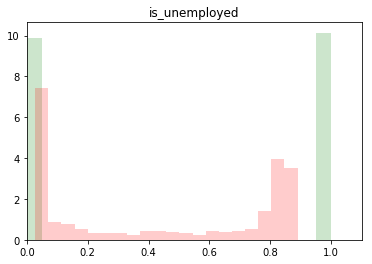

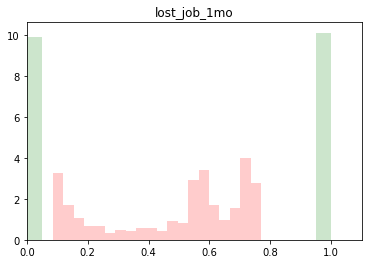

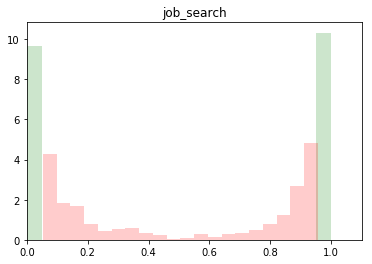

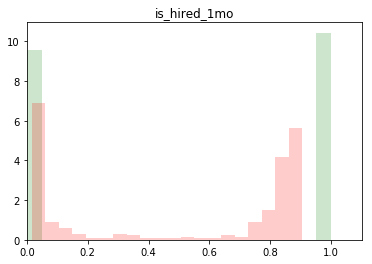

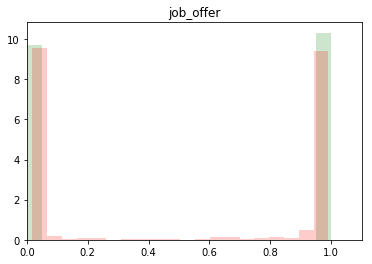

In [5]:
# histograms plot

import pickle

# with open("./all_pred_8.2.pkl", 'rb') as f:
#     # The protocol version used is detected automatically, so we do not
#     # have to specify it.
#     all_pred = pickle.load(f)


for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print(column)
    merged = all_pred[column]
    
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(merged['class'], bins=20, density = True, color = 'green', alpha = 0.2)
#     plt.hist(merged['neg'], bins=20, density = True, color = 'green', alpha = 0.2)

    plt.hist(merged['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
#     plt.hist(merged['neg'], bins=20, density = True, color = 'green', alpha = 0.2)
#     plt.hist(merged['neg_model'], bins=20, density = True, color = 'blue', alpha = 0.2)
#     ax.set_yscale('log')

    # plt..yscale(value)
    plt.title(column)
#     ax.legend()
    plt.xlim(0,1.1)
    
    merged.to_csv('merged_{}.csv'.format(column))

#     plt.savefig('/scratch/da2734/twitter/mturk_mar6/data_binary/plot_{}.png'.format(column))

is_unemployed 20
is_unemployed


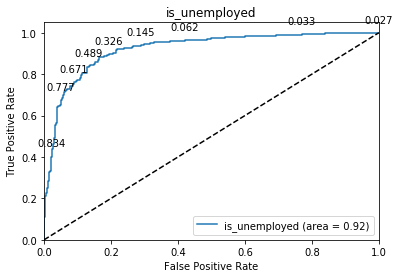

lost_job_1mo 10
lost_job_1mo


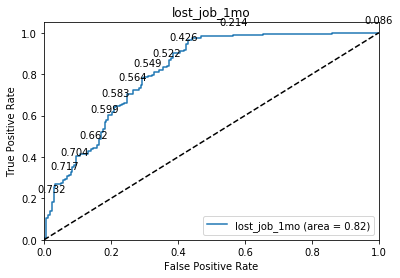

job_search 10
job_search


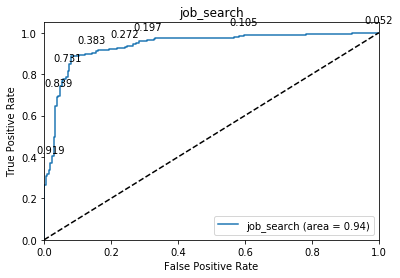

is_hired_1mo 5
is_hired_1mo


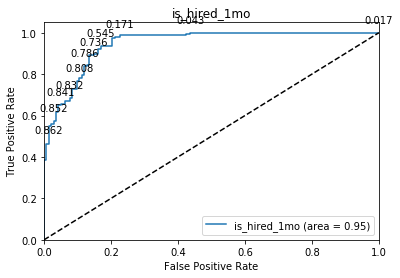

job_offer 15
job_offer


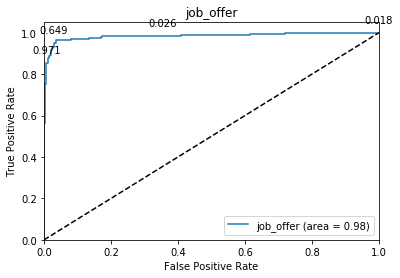

In [6]:
# ROC plot using predicted values on validation set directly i.e. not through validation

import pickle

# with open("./all_pred_8.2.pkl", 'rb') as f:
#     # The protocol version used is detected automatically, so we do not
#     # have to specify it.
#     all_pred = pickle.load(f)
    
def plot_ROC(column, interval):
    
    print(column)
    merged = all_pred[column]
#     print(merged.head())

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    y_true = merged['class']
    y_pred = merged['pos_model']

#    print(y_true)
    # Compute micro-average ROC curve and ROC area
 
    fpr["micro"], tpr["micro"], thresholds = roc_curve(y_true.ravel(), y_pred.ravel())
#     print('fpr["micro"]', fpr["micro"])
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#     print(fpr["micro"])
    
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"], label='{0} (area = {1:0.2f})'
                                   ''.format(column, roc_auc["micro"]))
    count = 0
    for t,x,y in zip(thresholds, fpr["micro"],tpr["micro"]):
#         print(t,x,y)
        count = count + 1

        label = "{:.3f}".format(t)

        if count%interval == 0:
            plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center'
                    ) # horizontal alignment can be left, right or center
    plt.annotate(label, # this is the text
         (x,y), # this is the point to label
         textcoords="offset points", # how to position the text
         xytext=(0,10), # distance from text to points (x,y)
         ha='center'
        ) # horizontal alignment can be left, right or center
    
    plt.plot([0, 1], [0, 1], 'k--') #line y=x
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.title(column)

    plt.show()    

for column in [ ("is_unemployed",20), 
                 ("lost_job_1mo", 10),
                 ("job_search", 10),
                 ("is_hired_1mo", 5), 
                 ("job_offer", 15) 
              ]:
    print(column[0], column[1])
    plot_ROC(column[0], column[1])
#     plot_ROC('is_unemployed', 10)
    
# merged.head()

is_unemployed


/home/manuto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in long_scalars


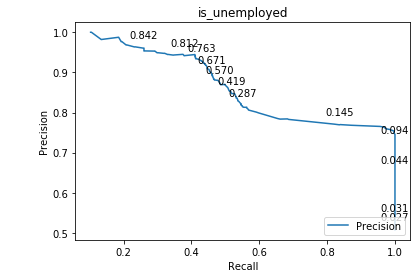

lost_job_1mo


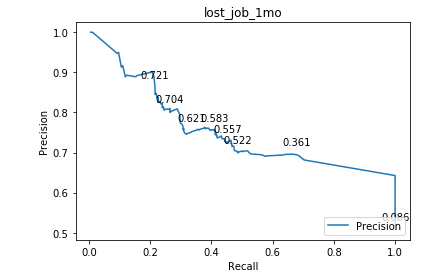

job_search


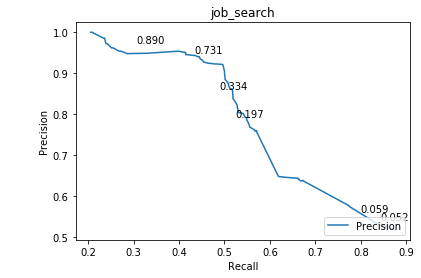

is_hired_1mo


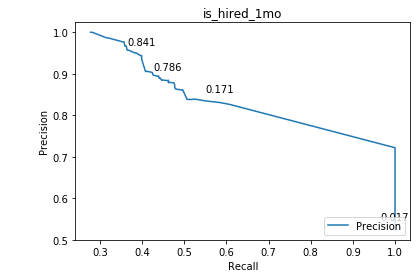

job_offer


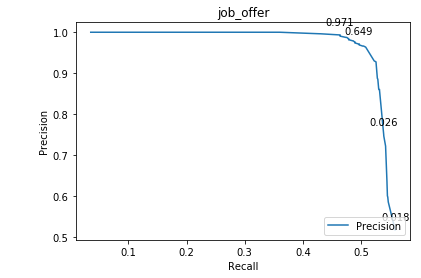

In [7]:
# ROC plot using predicted values on validation set directly i.e. not through validation

import pickle

for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:

    print(column)
    results = pd.DataFrame()
    
    merged = all_pred[column]
#     print(merged.head())

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    y_true = merged['class']
    y_pred = merged['pos_model']

    fpr["micro"], tpr["micro"], threshold_list = roc_curve(y_true.ravel(), y_pred.ravel())
#     print('fpr["micro"]', fpr["micro"])
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])    
    
    merged['pos'] = merged['class'] 
    merged['neg'] = abs(1-merged['pos'])
#     print(merged.head())
    
    for threshold in threshold_list:
#         print(threshold)        
        TP = np.sum(merged.loc[merged['pos_model'] > threshold, 'pos'])
        FP = np.sum(merged.loc[merged['pos_model'] > threshold, 'neg'])
        TN = np.sum(merged.loc[merged['neg_model'] < threshold, 'neg'])
        FN = np.sum(merged.loc[merged['neg_model'] < threshold, 'pos'])
    #     TN = np.sum(merged.loc[merged['neg_model'] > threshold, 'neg'])
    #     FN = np.sum(merged.loc[merged['neg_model'] > threshold, 'neg'])

#         total = sum([TP, FP, TN, FN]) 
#     #     print(threshold, TP/total, FP/total, TN/total, FN/total, total)
#         print(column, 'Recall:', str(TP/(TP+FN))[:4],  'Precision', str(TP/(TP+FP))[:4],
#     #           'FPR:', FP/(FP+TN)
#              )

        Recall = TP/(TP+FN)
        Precision = TP/(TP+FP)
        
        results = results.append({'threshold': threshold, 'Recall': Recall, 'Precision': Precision}, ignore_index=True)

    plt.figure()
    plt.plot(results['Recall'], results['Precision'])
    
    count = 0
    for t,x,y in zip(threshold_list, results['Recall'], results['Precision']):
#         print(t,x,y)
        count = count + 1

        label = "{:.3f}".format(t)

        if count%15 == 0 or count == 1:
#             print(count)
            plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center'
                    ) # horizontal alignment can be left, right or center
    plt.annotate(label, # this is the text
         (x,y), # this is the point to label
         textcoords="offset points", # how to position the text
         xytext=(0,10), # distance from text to points (x,y)
         ha='center'
        ) # horizontal alignment can be left, right or center
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(column)
    plt.legend(loc="lower right")

    plt.show()   
    

#     break
  

# for column in [ ("is_unemployed",15), 
#                  ("lost_job_1mo", 5),
#                  ("job_search", 10),
#                  ("is_hired_1mo", 5), 
#                  ("job_offer", 10) 
#               ]:
# #     print(column[0], column[1])
#     plot_precision_recall(column[0])
#     break
# #     plot_ROC('is_unemployed', 10)
    
# # merged.head()

is_unemployed Recall: 0.50 Precision 0.86
lost_job_1mo Recall: 0.41 Precision 0.75
job_search Recall: 0.46 Precision 0.92
is_hired_1mo Recall: 0.46 Precision 0.88
job_offer Recall: 0.49 Precision 0.97


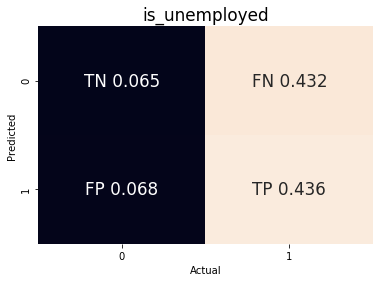

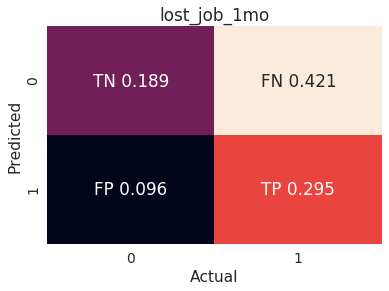

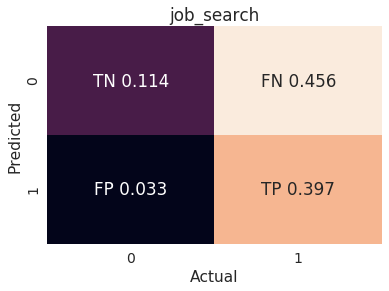

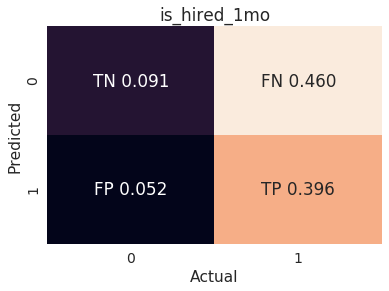

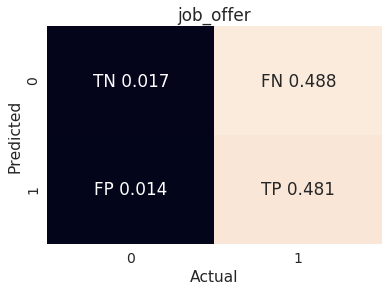

In [8]:
# confusion matrix

import seaborn as sn
from matplotlib.colors import ListedColormap

thresholds_dict = {
    'is_unemployed': 0.489,
    'lost_job_1mo':  0.583,
    'job_search':  0.731,  
    'is_hired_1mo':  0.786,
    'job_offer':     0.649,
}

for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
# for column in ["job_offer"]:
    merged = all_pred[column]
    merged['pos'] = merged['class'] 


    merged['neg'] = abs(1-merged['pos'])
#     print(merged.head())
    threshold = thresholds_dict[column]
#     print(threshold)
    
#     print(merged.loc[merged['pos_model'] > 0.9])
    TP = np.sum(merged.loc[merged['pos_model'] > threshold, 'pos'])
    FP = np.sum(merged.loc[merged['pos_model'] > threshold, 'neg'])
    TN = np.sum(merged.loc[merged['neg_model'] < threshold, 'neg'])
    FN = np.sum(merged.loc[merged['neg_model'] < threshold, 'pos'])
#     TN = np.sum(merged.loc[merged['neg_model'] > threshold, 'neg'])
#     FN = np.sum(merged.loc[merged['neg_model'] > threshold, 'neg'])
    
    total = sum([TP, FP, TN, FN]) 
#     print(threshold, TP/total, FP/total, TN/total, FN/total, total)
    print(column, 'Recall:', str(TP/(TP+FN))[:4],  'Precision', str(TP/(TP+FP))[:4],
#           'FPR:', FP/(FP+TN)
         )

    confusion_matrix = np.array([
                                [TN/total, FN/total],
                                [FP/total, TP/total]
                                ])
    labels =           np.array([
                                ['TN', 'FN'],
                                ['FP', 'TP']
                                ])
    
    labels = (np.asarray(["{0} {1:.3f}".format(string, value)
                      for string, value in zip(labels.flatten(),
                                               confusion_matrix.flatten())])
         ).reshape(2, 2)
#     print(labels)
    
    fig, ax = plt.subplots(1)
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(confusion_matrix, annot=labels, fmt="", cbar=False)
    ax.set(xlabel='Actual', ylabel='Predicted')
    plt.title(column)
    
